# Waterbomb cell - 5 parameter folding

In [1]:
import sympy as sp
sp.init_printing()
import numpy as np

## Upper right corner node

Control parameters $a, b, c$ and angle $\alpha$

In [2]:
a, b, c = sp.symbols('a, b, c', positive=True)
alpha = sp.symbols('alpha', positive=True)

Position variables to be determined for the above control parameters

In [3]:
x_ur, y_ur, z_ur = sp.symbols(r'x^{\urcorner}, y^{\urcorner}, z^{\urcorner}')#, positive=True)

Node $V^\dashv$ rotates in the $xz$ plane. The control angle $\alpha = \pi/2$ for a flat state, i.e. $z^\dashv(\alpha=\pi/2) = 0$
\begin{align}
 V^\dashv = [c \sin(\alpha), 0, c \cos(\alpha)]
\end{align}

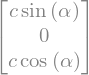

In [4]:
V_r_l = sp.Matrix([c * sp.sin(alpha), 0, c * sp.cos(alpha)])
V_r_l

Positions of $U^\urcorner_0$ and $V^\dashv_0$ 

In [5]:
U_ur_0 = sp.Matrix([a, b, 0])
V_r_0 = sp.Matrix([c, 0, 0])

Express the lengths $|OU^{\urcorner}|$ and $|U^{\urcorner}V^\dashv|$ in initial state

In [6]:
UV_r_0 = V_r_0 - U_ur_0
L2_U_ur_0 = (U_ur_0.T * U_ur_0)[0]
L2_UV_r_0 = (UV_r_0.T * UV_r_0)[0]

And in a general state of folding

In [7]:
U_ur_1 = sp.Matrix([x_ur, y_ur, z_ur])
UV_r_1 = U_ur_1 - V_r_l
L2_U_ur_1 = (U_ur_1.T * U_ur_1)[0]
L2_UV_r_1 = (UV_r_1.T * UV_r_1)[0]

Use the two quadratic equations to find $y^{\urcorner}$ and $z^\urcorner$ 

In [8]:
Eq_L2_U_ur = sp.simplify(sp.Eq(L2_U_ur_1-L2_U_ur_0,0))
y_ur_sol = sp.solve(Eq_L2_U_ur, y_ur)[0]
Eq_L2_UV_r = sp.simplify(sp.Eq(L2_UV_r_1-L2_UV_r_0,0))
Eq_L2_UV_r_z_ur = Eq_L2_UV_r.subs(y_ur, y_ur_sol)
z_ur_sol = sp.solve(Eq_L2_UV_r_z_ur, z_ur)[0]
U_ur = sp.Matrix([x_ur, y_ur_sol.subs(z_ur, z_ur_sol), z_ur_sol])

The resulting position of $U^\urcorner$ reads

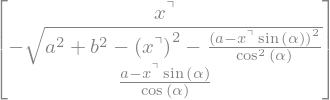

In [9]:
U_ur

Check the obtained coordinates for $\lim_{\alpha \rightarrow 0} U^\urcorner$ for $x^\urcorner = a$

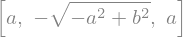

In [10]:
[sp.limit( U_ur.subs(x_ur,a)[idx], alpha, 0) for idx in [0,1,2]]

In a symmetric case, the other corner points can be simply mirrored 
with respect to the symmetry planes $xz$ and $xy$.

## Upper left corner in non-symmetric case
Considering the upper left corner, we can reuse the solution of the upper right corner by
substituting $U^{\urcorner} = - U^\ulcorner$
and alternating the sign of the $x$ coordinate. 

In [11]:
x_ul = sp.symbols(r'x^{\ulcorner}') #, negative=True)

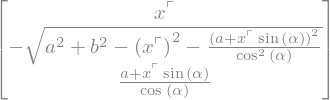

In [12]:
U_ul = U_ur.subs(x_ur, -x_ul)
U_ul[0] *= -1
U_ul

Check the limits

In [13]:
[sp.limit( U_ul.subs(x_ul,-a)[idx], alpha, sp.pi/2) for idx in [0,1,2]]

Define a vector $U^{\ulcorner\urcorner}$ as

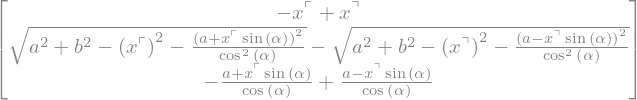

In [14]:
UU_u_1 = U_ur - U_ul
UU_u_1

Verify that by substituting $u^\urcorner = a$ and $u^\ulcorner = -1$ the symmetric case is recovered

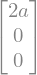

In [15]:
UU_u_1.subs({x_ur:a, x_ul:-a})

Considering again the non-symmetric configuration let us calculate the squaer of the vector length $| U^{\ulcorner\urcorner} |^2$

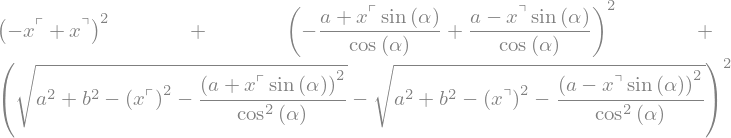

In [16]:
L2_UU_u_1 = (UU_u_1.T * UU_u_1)[0]
L2_UU_u_1

In [17]:
eta = sp.symbols('eta')

To control the twist of the non-symmetric fold mode of the waterbomb base, let us link $x^\ulcorner$ with 
$x^\urcorner$ by setting
\begin{align}
 x^\ulcorner = - \eta \, x^\urcorner
\end{align}

In [18]:
x_ul_ = - eta * x_ur

and substitute for $x^\ulcorner$ in $|U^{\ulcorner\urcorner}|^2$ to obtain

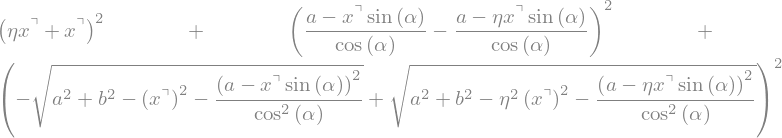

In [19]:
L2_UU_u_1_eta = L2_UU_u_1.subs(x_ul,x_ul_)
L2_UU_u_1_eta

Finally, require that the length $|U^{\ulcorner\urcorner}| = 2a$ is equal to the original length
at any state of folding

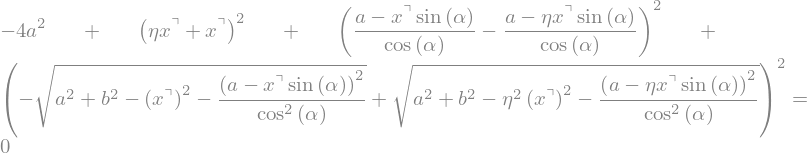

In [20]:
Eq_L2_UU_u_1 = sp.Eq(L2_UU_u_1_eta-(2*a)**2, 0)
Eq_L2_UU_u_1

The solver 

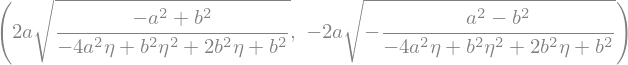

In [21]:
x_ur_sol_1, x_ur_sol_2 = sp.solve(Eq_L2_UU_u_1.subs(alpha,0), x_ur)
x_ur_sol_1, x_ur_sol_2

$\eta = 1$ recovers the symmetric case

In [22]:
sp.simplify(x_ur_sol_1.subs(eta,1))